In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# These are the results of sieving an attapulgite-type mineral 

### Mean particle diameter

<p style="font-size: 24px;">$\bar{D}_{p}= \frac{(D_P)_1 + (D_P)_2}{2}$ (1)</p>

### The mean surface area diameter

<p style="font-size: 24px;">
$\bar{D}_{pA}= \sqrt{\frac{\sum_{i=1}^{N}\left(\frac{\Delta m_i}{\bar{D}_{p_i}}\right)}{\sum_{i=1}^{N}\left(\frac{\Delta m_i}{\bar{D}_{p_i}^3}\right)}}$ (2)</p>



In [2]:
sieve_weight = np.array([326.68, 262.36, 264.60, 272.40, 289.69, 306.37, 306.38, 334.79])
gross_sieve_weight = np.array([326.70, 262.43, 265.65, 278.24, 292.66, 311.32, 308.21, 334.82])
sieve_hole_diameter = np.array([0.000, 0.180, 0.250, 0.355, 0.500, 0.600, 1.000, 1.400])

net_seive_weight = gross_sieve_weight - sieve_weight

mass_fraction = net_seive_weight/net_seive_weight.sum()

mean_particle_diameter = (sieve_hole_diameter[:-1] + sieve_hole_diameter[1:])/2

mean_surf_area_diameter_of_particles = np.sqrt((mass_fraction[:-1]/mean_particle_diameter).sum()/\
                                                  (mass_fraction[:-1]/mean_particle_diameter**3).sum())

print("The average surface area diameter is", np.round(mean_surf_area_diameter_of_particles,3), "mm")

The average surface area diameter is 0.419 mm


Text(0, 0.5, 'mass fraction')

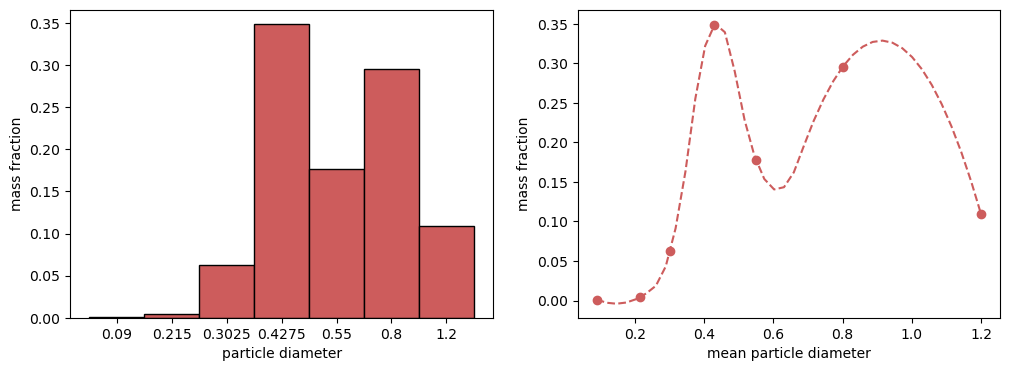

In [3]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))

ax[0].bar(mean_particle_diameter.astype(str), mass_fraction[:-1], width = 1.0, edgecolor='k', color = 'indianred')
ax[0].set_xlabel("particle diameter")
ax[0].set_ylabel("mass fraction")

# smooth the line
def smooth_plot(x, y):
    f = interp1d(x, y, kind='quadratic')
    x_new = np.linspace(x.min(), x.max(), 40)
    y_smooth = f(x_new)
    ax[1].plot(x_new, y_smooth, color = "indianred", linestyle = "--")
    return y_smooth
    
y_smooth = smooth_plot(mean_particle_diameter, mass_fraction[:-1])

ax[1].plot(mean_particle_diameter, mass_fraction[:-1], 'o', color = "indianred")
ax[1].set_xlabel("mean particle diameter")
ax[1].set_ylabel("mass fraction")